# Tutorial: Feedforward neural networks in PyTorch

Mothers and Machine Learning

April 6, 2022

Code by Lauren Hayward, Juan Carrasquilla, and Mohamed Hibat Allah

## Create and plot the data set


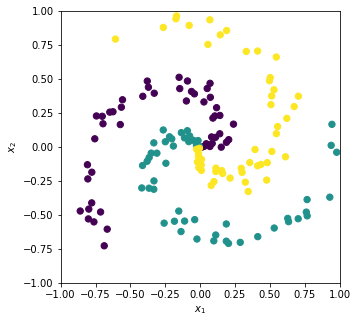

In [18]:
# Lauren's code
# from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

N = 50 # number of points per branch
K = 3  # number of branches

N_train = N*K # total number of points in the training set
x_train = np.zeros((N_train,2)) # matrix containing the 2-dimensional datapoints
t_train = np.zeros(N_train, dtype='uint8') # labels (not in one-hot representation)

mag_noise = 0.3  # controls how much noise gets added to the data
dTheta    = 4    # difference in theta in each branch

### Data generation: ###
for j in range(K):
  ix = range(N*j,N*(j+1))
  r  = np.linspace(0.01,1,N) # radius
  th = np.linspace(j*(2*np.pi)/K,j*(2*np.pi)/K + dTheta,N) + np.random.randn(N)*mag_noise # theta
  x_train[ix] = np.c_[r*np.cos(th), r*np.sin(th)]
  t_train[ix] = j

### Plot the data set: ###
fig = plt.figure(1, figsize=(5,5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train, s=40)#, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('spiral_data.pdf', bbox_inches="tight")
plt.show()

In [ ]:
#Run this cell if you want to save a pdf plot of the dataset:
#files.download('spiral_data.pdf')

Initialized the lists for the 3 types of activation function with 3 different orderings, along with the different learning rates (which I will be using later). 

In [ ]:
# Learning rate for all is 1, maximum epochs is 10 000, K=3
# The name at the front states which activation is being put in the first layer
# This section is for the second activation function being softmax:
softmax_final_accr = []
softmax_max_accr = []
softmax_max_accr_epoch = []
softmax_final_cost = []
softmax_max_accr_cost = []

sigmoid_final_accr = []
sigmoid_max_accr = []
sigmoid_max_accr_epoch = []
sigmoid_final_cost = []
sigmoid_max_accr_cost = []

relu_final_accr = []
relu_max_accr = []
relu_max_accr_epoch = []
relu_final_cost = []
relu_max_accr_cost = []

# This section is for the second activation function being sigmoid:
softmax2_final_accr = []
softmax2_max_accr = []
softmax2_max_accr_epoch = []
softmax2_final_cost = []
softmax2_max_accr_cost = []

sigmoid2_final_accr = []
sigmoid2_max_accr = []
sigmoid2_max_accr_epoch = []
sigmoid2_final_cost = []
sigmoid2_max_accr_cost = []

relu2_final_accr = []
relu2_max_accr = []
relu2_max_accr_epoch = []
relu2_final_cost = []
relu2_max_accr_cost = []

# This section is for the second activation function being relu:
softmax3_final_accr = []
softmax3_max_accr = []
softmax3_max_accr_epoch = []
softmax3_final_cost = []
softmax3_max_accr_cost = []

sigmoid3_final_accr = []
sigmoid3_max_accr = []
sigmoid3_max_accr_epoch = []
sigmoid3_final_cost = []
sigmoid3_max_accr_cost = []

relu3_final_accr = []
relu3_max_accr = []
relu3_max_accr_epoch = []
relu3_final_cost = []
relu3_max_accr_cost = []

# For this section both activation functions will be softmax, and epochs = 55000, K=3
# This section is for changing the learning rate: 0.1, 0.5, 1, 2, 3, 4
# Learning rate: 0.1
alpha1_final_accr = []
alpha1_max_accr = []
alpha1_max_accr_epoch = []
alpha1_final_cost = []
alpha1_max_accr_cost = []

# Learning rate: 0.5
alpha2_final_accr = []
alpha2_max_accr = []
alpha2_max_accr_epoch = []
alpha2_final_cost = []
alpha2_max_accr_cost = []

# Learning rate: 1
alpha3_final_accr = []
alpha3_max_accr = []
alpha3_max_accr_epoch = []
alpha3_final_cost = []
alpha3_max_accr_cost = []

# Learning rate: 2
alpha4_final_accr = []
alpha4_max_accr = []
alpha4_max_accr_epoch = []
alpha4_final_cost = []
alpha4_max_accr_cost = []

# Learning rate: 3
alpha5_final_accr = []
alpha5_max_accr = []
alpha5_max_accr_epoch = []
alpha5_final_cost = []
alpha5_max_accr_cost = []

# Learning rate: 4
alpha6_final_accr = []
alpha6_max_accr = []
alpha6_max_accr_epoch = []
alpha6_final_cost = []
alpha6_max_accr_cost = []

## Define the network architecture

In [629]:
# Lauren's code
%matplotlib inline
from IPython import display

import time
import torch

class FeedforwardNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
      # super is inheriting a lot of functionality that is getting from elsewhere
        super(FeedforwardNN, self).__init__()

        #layer sizes:
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        #functions used within the Feedforward NN:
        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.linear2 = torch.nn.Linear(self.hidden_size, self.output_size)
        # These do not need anything inside because the same will come out as it goes in
        self.relu    = torch.nn.ReLU() 
        self.sigmoid = torch.nn.Sigmoid()
        self.softmax = torch.nn.Softmax()   
    # Really important function: how your function propogates forward:   
    def forward(self, x):
        #Layer 1:
        linear1_out = self.linear1(x)
        h1 = self.softmax(linear1_out)
        #Layer 2:
        linear2_out = self.linear2(h1)
        h2 = self.softmax(linear2_out)

        #Network output:
        y = h2

        return y

input_size = 2 #2D data
hidden_size = 4
output_size = K 
model = FeedforwardNN(input_size, hidden_size, output_size)

### Store the input data as a PyTorch tensor ###
x_train = torch.tensor(x_train, dtype = torch.float)

### One hot encoding ###
t_onehot = np.zeros((t_train.size, K))
t_onehot[np.arange(t_train.size),t_train] = 1
t_onehot = torch.tensor(t_onehot, dtype = torch.float)

### Use backpropagation to minimize the cost function using the gradient descent algorithm: ###
learning_rate = 1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Cost function: ###
cost_func = torch.nn.CrossEntropyLoss()

N_epochs = 55000 # number of times to run gradient descent


/var/folders/2f/v588s3cn6bqfcb4gvqd8hc7r0000gn/T/ipykernel_83843/330597805.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype = torch.float)


## Training

Final Training cost 0.779210
Final Training accuracy 0.773333



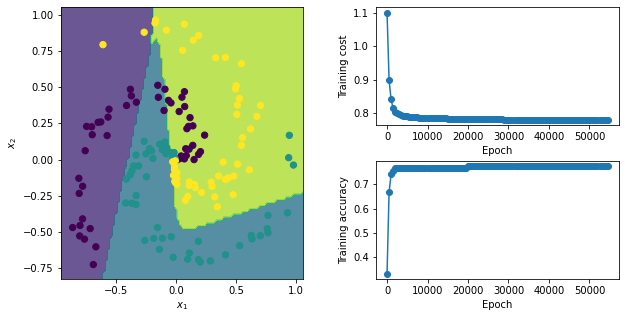

In [630]:
# Lauren's code
epoch_list    = []
cost_training = []
acc_training  = []

############ Function for plotting: ############
def updatePlot():

    ### Generate coordinates covering the whole plane: ###
    padding = 0.1
    spacing = 0.02
    x1_min, x1_max = x_train[:, 0].min() - padding, x_train[:, 0].max() + padding
    x2_min, x2_max = x_train[:, 1].min() - padding, x_train[:, 1].max() + padding
    x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, spacing),
                         np.arange(x2_min, x2_max, spacing))

    torch_input = torch.tensor(np.c_[x1_grid.ravel(), x2_grid.ravel()], dtype = torch.float)
    NN_output = model(torch_input)
    predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)

    ### Plot the classifier: ###
    plt.subplot(121)
    plt.contourf(x1_grid, x2_grid, predicted_class.reshape(x1_grid.shape), K, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train, s=40)
    plt.xlim(x1_grid.min(), x1_grid.max())
    plt.ylim(x2_grid.min(), x2_grid.max())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    ### Plot the cost function during training: ###
    plt.subplot(222)
    plt.plot(epoch_list,cost_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training cost')

    ### Plot the training accuracy: ###
    plt.subplot(224)
    plt.plot(epoch_list,acc_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training accuracy')
############ End of plotting function ############

### Train for several epochs: ###
for epoch in range(N_epochs):

    optimizer.zero_grad() # sets the gradients to zero (necessary since PyTorch accumulates the gradients)
    NN_output = model(x_train) # Neural network output
    cost = cost_func(NN_output, t_onehot)
    cost.backward() #computes the gradients
    optimizer.step() #updating the parameters 

    ### Update the plot and print results every 500 epochs: ###
    if epoch % 500 == 0:
        predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)
        accuracy = np.mean(predicted_class == t_train)
        
        epoch_list.append(epoch)
        cost_training.append(cost.detach().numpy())
        acc_training.append(accuracy)
        
        ### Update the plot of the resulting classifier: ###
        fig = plt.figure(2,figsize=(10,5))
        fig.subplots_adjust(hspace=.3,wspace=.3)
        plt.clf()
        updatePlot()
        display.display(plt.gcf())
        print("Iteration %d:\n  Training cost %f\n  Training accuracy %f\n" % (epoch, cost, accuracy) )
        display.clear_output(wait=True)
        # time.sleep(0.1) #Uncomment this line if you want to slow down the rate of plot updates


# Anja's code
# Creating variable to store in the lists: 
# max accuracy, max accuracy epoch value, max accuracy cost value
accuracy_max = max(acc_training)
max_index = acc_training.index(max(acc_training))
epoch_max = epoch_list[max_index]
cost_max = cost_training[max_index]

# name at the start was changed based on which parameters were used
# alpha6_final_accr.append(accuracy)
# alpha6_max_accr.append(accuracy_max)
# alpha6_max_accr_epoch.append(epoch_max)
# alpha6_final_cost.append(cost)
# alpha6_max_accr_cost.append(cost_max)


# plt.savefig('spiral_results_.png', bbox_inches="tight")
print("Final Training cost %f\nFinal Training accuracy %f\n" % (cost, accuracy) )


-----

## 2.1d) Changing Activation Function

Since the cost value is in tensor format, I put it in a list to the iterate through to pull the float from the tensor and array.

In [304]:
softmax_final_cost_update = []
softmax_max_accr_cost_update = []

sigmoid_final_cost_update = []
sigmoid_max_accr_cost_update = []

relu_final_cost_update = []
relu_max_accr_cost_update = []

In [305]:
for i in range(0,10):
    softmax_final_cost_update.append(float(softmax_final_cost[i].detach().numpy()))
    softmax_max_accr_cost_update.append(float(softmax_max_accr_cost[i]))
    
    sigmoid_final_cost_update.append(float(sigmoid_final_cost[i].detach().numpy()))
    sigmoid_max_accr_cost_update.append(float(sigmoid_max_accr_cost[i]))
    
    relu_final_cost_update.append(float(relu_final_cost[i].detach().numpy()))
    relu_max_accr_cost_update.append(float(relu_max_accr_cost[i]))

Here we create a df to store all the data we collected above plus calculate mean and median for each column. 

In [313]:
activation_fn_compare = pd.DataFrame({
    'softmax_max_accr' : softmax_max_accr,
    'sigmoid_max_accr' : sigmoid_max_accr,
    'relu_max_accr' : relu_max_accr,
    'softmax_max_acc_epoch' : softmax_max_accr_epoch,
    'sigmoid_max_acc_epoch' : sigmoid_max_accr_epoch,
    'relu_max_acc_epoch' : relu_max_accr_epoch,
    'softmax_max_acc_cost' : softmax_max_accr_cost_update,
    'sigmoid_max_acc_cost' : sigmoid_max_accr_cost_update,
    'relu_max_acc_cost' : relu_max_accr_cost_update,
    'softmax_final_accr' : softmax_final_accr,
    'sigmoid_final_accr' : sigmoid_final_accr,
    'relu_final_accr' : relu_final_accr,
    'softmax_final_cost' : softmax_final_cost_update,
    'sigmoid_final_cost' : sigmoid_final_cost_update,
    'relu_final_cost' : relu_final_cost_update
})
activation_fn_compare.loc['mean'] = activation_fn_compare[0:10].mean(axis=0)
activation_fn_compare.loc['median'] = activation_fn_compare[0:10].median(axis=0)
activation_fn_compare

,softmax_max_accr,sigmoid_max_accr,relu_max_accr,softmax_max_acc_epoch,sigmoid_max_acc_epoch,relu_max_acc_epoch,softmax_max_acc_cost,sigmoid_max_acc_cost,relu_max_acc_cost,softmax_final_accr,sigmoid_final_accr,relu_final_accr,softmax_final_cost,sigmoid_final_cost,relu_final_cost
0,0.833333,0.913333,0.780000,6500.0,8000.0,1500.0,0.751689,0.685755,0.787212,0.833333,0.913333,0.780000,0.736334,0.676618,0.770635
1,0.746667,0.766667,0.786667,7500.0,7500.0,2000.0,0.851946,0.792012,0.782483,0.746667,0.766667,0.786667,0.839114,0.787375,0.767069
2,0.840000,0.940000,0.800000,9000.0,9500.0,2000.0,0.736554,0.657044,0.769532,0.840000,0.940000,0.800000,0.734526,0.652574,0.755775
3,0.746667,0.933333,0.786667,7500.0,9000.0,5000.0,0.810926,0.660773,0.783172,0.746667,0.933333,0.786667,0.807158,0.657189,0.775056
4,0.753333,0.966667,0.786667,4500.0,8000.0,2500.0,0.820399,0.656132,0.781802,0.753333,0.960000,0.786667,0.800666,0.641356,0.767300
5,0.746667,0.800000,0.766667,8000.0,7500.0,500.0,0.831251,0.766928,0.815245,0.733333,0.800000,0.766667,0.823255,0.756202,0.784533
6,0.746667,0.926667,0.806667,8000.0,9000.0,5500.0,0.831529,0.679442,0.758754,0.733333,0.920000,0.806667,0.823452,0.670559,0.753023
7,0.786667,0.793333,0.786667,3000.0,6500.0,6000.0,0.806119,0.771783,0.772776,0.786667,0.793333,0.786667,0.765566,0.763276,0.770134
8,0.746667,0.786667,0.753333,7500.0,7000.0,2500.0,0.830159,0.779336,0.818198,0.740000,0.786667,0.753333,0.811978,0.765848,0.804137
9,0.826667,0.766667,0.753333,9000.0,8000.0,1500.0,0.744234,0.792854,0.810794,0.826667,0.766667,0.753333,0.739317,0.787769,0.801787


Save to CSV

In [319]:
# activation_fn_compare.to_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/python/A4/activation_fn_compare.csv')


Analyzing data for max of softmax, sigmoid, relu (second function being softmax):

In [708]:
acc = activation_fn_compare[['softmax_max_accr','sigmoid_max_accr','relu_max_accr']]
acc_mean = acc.loc['mean']
max_acc_mean_loc = acc_mean.idxmax()
max_acc_mean = acc_mean.max()
print(f'The maximum occurs at: {max_acc_mean_loc} \nwith a maximum accuracy of: {max_acc_mean}')

The maximum occurs at: sigmoid_max_accr 
with a maximum accuracy of: 0.8593333333333334


In [709]:
acc_epoch = activation_fn_compare[['softmax_max_acc_epoch','sigmoid_max_acc_epoch','relu_max_acc_epoch']]
acc_epoch_mean = acc_epoch.loc['mean']
max_acc_epoch_mean_loc = acc_epoch_mean.idxmax()
max_acc_epoch_mean = acc_epoch_mean.max()
print(f'The maximum number of epoch for max accuracy occurs at: {max_acc_epoch_mean_loc} \nwith a maximum epoch level of: {max_acc_epoch_mean}')


The maximum number of epoch for max accuracy occurs at: sigmoid_max_acc_epoch 
with a maximum epoch level of: 8000.0


In [710]:
acc_cost = activation_fn_compare[['softmax_max_acc_cost','sigmoid_max_acc_cost','relu_max_acc_cost']]
acc_cost_mean = acc_cost.loc['mean']
max_acc_cost_mean_loc = acc_cost_mean.idxmax()
max_acc_cost_mean = acc_cost_mean.max()
print(f'The maximum cost for the max accuracy occurs at: {max_acc_cost_mean_loc} \nwith a maximum cost of: {max_acc_cost_mean}')


The maximum cost for the max accuracy occurs at: softmax_max_acc_cost 
with a maximum cost of: 0.801480484008789


In [707]:
(activation_fn_compare[['sigmoid_max_accr','sigmoid_max_acc_epoch','sigmoid_max_acc_cost','sigmoid_final_accr','sigmoid_final_cost']]).loc[['mean','median']]


,sigmoid_max_accr,sigmoid_max_acc_epoch,sigmoid_max_acc_cost,sigmoid_final_accr,sigmoid_final_cost
mean,0.859333,8000.0,0.724206,0.858000,0.715876
median,0.856667,8000.0,0.726341,0.856667,0.716410


### Conclusion  
As can be seen when softmax is the second activation function, sigmoid performs best as the first activation function. It does require the most epochs but does not have the highest cost.

-----------------

Theoretically, I understand that ReLU and Sigmoid should not be put at the last layer (output) because they are not good at multi-classes but I wanted to see in practice just how much worse they do and how the combinations change for each of them.

**Out of curiosity, I decided to check out accuracy comparisons if we changed the second function to sigmoid**

In [339]:
softmax2_final_cost_update = []
softmax2_max_accr_cost_update = []

sigmoid2_final_cost_update = []
sigmoid2_max_accr_cost_update = []

relu2_final_cost_update = []
relu2_max_accr_cost_update = []

In [340]:
for i in range(0,10):
    softmax2_final_cost_update.append(float(softmax2_final_cost[i].detach().numpy()))
    softmax2_max_accr_cost_update.append(float(softmax2_max_accr_cost[i]))
    
    sigmoid2_final_cost_update.append(float(sigmoid2_final_cost[i].detach().numpy()))
    sigmoid2_max_accr_cost_update.append(float(sigmoid2_max_accr_cost[i]))
    
    relu2_final_cost_update.append(float(relu2_final_cost[i].detach().numpy()))
    relu2_max_accr_cost_update.append(float(relu2_max_accr_cost[i]))

Here we create a df to store all the data we collected above plus calculate mean and median for each column. 

In [341]:
activation2_fn_compare = pd.DataFrame({
    'softmax_max_accr' : softmax2_max_accr,
    'sigmoid_max_accr' : sigmoid2_max_accr,
    'relu_max_accr' : relu2_max_accr,
    'softmax_max_acc_epoch' : softmax2_max_accr_epoch,
    'sigmoid_max_acc_epoch' : sigmoid2_max_accr_epoch,
    'relu_max_acc_epoch' : relu2_max_accr_epoch,
    'softmax_max_acc_cost' : softmax2_max_accr_cost_update,
    'sigmoid_max_acc_cost' : sigmoid2_max_accr_cost_update,
    'relu_max_acc_cost' : relu2_max_accr_cost_update,
    'softmax_final_accr' : softmax2_final_accr,
    'sigmoid_final_accr' : sigmoid2_final_accr,
    'relu_final_accr' : relu2_final_accr,
    'softmax_final_cost' : softmax2_final_cost_update,
    'sigmoid_final_cost' : sigmoid2_final_cost_update,
    'relu_final_cost' : relu2_final_cost_update
})
activation2_fn_compare.loc['mean'] = activation2_fn_compare[0:10].mean(axis=0)
activation2_fn_compare.loc['median'] = activation2_fn_compare[0:10].median(axis=0)
activation2_fn_compare

,softmax_max_accr,sigmoid_max_accr,relu_max_accr,softmax_max_acc_epoch,sigmoid_max_acc_epoch,relu_max_acc_epoch,softmax_max_acc_cost,sigmoid_max_acc_cost,relu_max_acc_cost,softmax_final_accr,sigmoid_final_accr,relu_final_accr,softmax_final_cost,sigmoid_final_cost,relu_final_cost
0,0.500000,0.666667,0.666667,8000.0,5000.0,4500.0,0.871840,0.821978,0.810380,0.493333,0.660000,0.660000,0.867434,0.736785,0.802282
1,0.740000,0.653333,0.640000,3500.0,8000.0,1000.0,0.772158,0.772653,0.842531,0.740000,0.646667,0.593333,0.732534,0.755362,0.807816
2,0.493333,0.773333,0.820000,4000.0,7500.0,6000.0,0.884794,0.732835,0.661455,0.493333,0.773333,0.820000,0.866262,0.706614,0.652082
3,0.720000,0.680000,0.626667,9000.0,4500.0,2000.0,0.783100,0.798242,0.830087,0.720000,0.666667,0.606667,0.760694,0.733111,0.809409
4,0.600000,0.693333,0.653333,5500.0,9500.0,9500.0,0.842410,0.739298,0.779372,0.600000,0.693333,0.653333,0.830756,0.737599,0.779007
5,0.600000,0.820000,0.673333,5500.0,9500.0,9500.0,0.842519,0.706626,0.824241,0.600000,0.820000,0.673333,0.830706,0.703577,0.823913
6,0.600000,0.766667,0.646667,2500.0,7000.0,2000.0,0.873705,0.714723,0.836495,0.600000,0.753333,0.600000,0.830982,0.699538,0.813577
7,0.613333,0.713333,0.573333,500.0,9000.0,5000.0,0.983321,0.736014,0.856239,0.600000,0.713333,0.566667,0.831149,0.728928,0.845855
8,0.600000,0.746667,0.780000,2500.0,6000.0,3000.0,0.876392,0.751038,0.729978,0.600000,0.746667,0.766667,0.831111,0.723650,0.685247
9,0.600000,0.646667,0.646667,4000.0,9000.0,4000.0,0.847092,0.802356,0.747643,0.600000,0.640000,0.646667,0.834086,0.798800,0.739724


Save to CSV

In [342]:
# activation2_fn_compare.to_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/python/A4/activation2_fn_compare.csv')


Analyzing data for max of softmax, sigmoid, relu (second function being sigmoid):

In [711]:
acc2 = activation2_fn_compare[['softmax_max_accr','sigmoid_max_accr','relu_max_accr']]
acc2_mean = acc2.loc['mean']
max2_acc_mean_loc = acc2_mean.idxmax()
max2_acc_mean = acc2_mean.max()
print(f'The maximum occurs at: {max2_acc_mean_loc} \nwith a maximum accuracy of: {max2_acc_mean}')


The maximum occurs at: sigmoid_max_accr 
with a maximum accuracy of: 0.716


In [712]:
acc2_epoch = activation2_fn_compare[['softmax_max_acc_epoch','sigmoid_max_acc_epoch','relu_max_acc_epoch']]
acc2_epoch_mean = acc2_epoch.loc['mean']
max2_acc_epoch_mean_loc = acc2_epoch_mean.idxmax()
max2_acc_epoch_mean = acc2_epoch_mean.max()
print(f'The maximum number of epoch for max accuracy occurs at: {max2_acc_epoch_mean_loc} \nwith a maximum epoch level of: {max2_acc_epoch_mean}')


The maximum number of epoch for max accuracy occurs at: sigmoid_max_acc_epoch 
with a maximum epoch level of: 7500.0


In [713]:
acc2_cost = activation2_fn_compare[['softmax_max_acc_cost','sigmoid_max_acc_cost','relu_max_acc_cost']]
acc2_cost_mean = acc2_cost.loc['mean']
max2_acc_cost_mean_loc = acc2_cost_mean.idxmax()
max2_acc_cost_mean = acc2_cost_mean.max()
print(f'The maximum cost for the max accuracy occurs at: {max2_acc_cost_mean_loc} \nwith a maximum cost of: {max2_acc_cost_mean}')


The maximum cost for the max accuracy occurs at: softmax_max_acc_cost 
with a maximum cost of: 0.8577331721782684


In [714]:
(activation2_fn_compare[['sigmoid_max_accr','sigmoid_max_acc_epoch','sigmoid_max_acc_cost','sigmoid_final_accr','sigmoid_final_cost']]).loc[['mean','median']]


,sigmoid_max_accr,sigmoid_max_acc_epoch,sigmoid_max_acc_cost,sigmoid_final_accr,sigmoid_final_cost
mean,0.716000,7500.0,0.757576,0.711333,0.732396
median,0.703333,7750.0,0.745168,0.703333,0.731019


**Conclusion**   
As can be seen when sigmoid is the second activation function, sigmoid performs best as the first activation function. It does require the most epochs but does not have the highest cost.

------

**Checking out accuracy comparisons, if we changed the second function to ReLU**

In [352]:
softmax3_final_cost_update = []
softmax3_max_accr_cost_update = []

sigmoid3_final_cost_update = []
sigmoid3_max_accr_cost_update = []

relu3_final_cost_update = []
relu3_max_accr_cost_update = []

In [353]:
for i in range(0,10):
    softmax3_final_cost_update.append(float(softmax3_final_cost[i].detach().numpy()))
    softmax3_max_accr_cost_update.append(float(softmax3_max_accr_cost[i]))
    
    sigmoid3_final_cost_update.append(float(sigmoid3_final_cost[i].detach().numpy()))
    sigmoid3_max_accr_cost_update.append(float(sigmoid3_max_accr_cost[i]))
    
    relu3_final_cost_update.append(float(relu3_final_cost[i].detach().numpy()))
    relu3_max_accr_cost_update.append(float(relu3_max_accr_cost[i]))

Here we create a df to store all the data we collected above plus calculate mean and median for each column. 

In [354]:
activation3_fn_compare = pd.DataFrame({
    'softmax_max_accr' : softmax3_max_accr,
    'sigmoid_max_accr' : sigmoid3_max_accr,
    'relu_max_accr' : relu3_max_accr,
    'softmax_max_acc_epoch' : softmax3_max_accr_epoch,
    'sigmoid_max_acc_epoch' : sigmoid3_max_accr_epoch,
    'relu_max_acc_epoch' : relu3_max_accr_epoch,
    'softmax_max_acc_cost' : softmax3_max_accr_cost_update,
    'sigmoid_max_acc_cost' : sigmoid3_max_accr_cost_update,
    'relu_max_acc_cost' : relu3_max_accr_cost_update,
    'softmax_final_accr' : softmax3_final_accr,
    'sigmoid_final_accr' : sigmoid3_final_accr,
    'relu_final_accr' : relu3_final_accr,
    'softmax_final_cost' : softmax3_final_cost_update,
    'sigmoid_final_cost' : sigmoid3_final_cost_update,
    'relu_final_cost' : relu3_final_cost_update
})
activation3_fn_compare.loc['mean'] = activation3_fn_compare[0:10].mean(axis=0)
activation3_fn_compare.loc['median'] = activation3_fn_compare[0:10].median(axis=0)
activation3_fn_compare

,softmax_max_accr,sigmoid_max_accr,relu_max_accr,softmax_max_acc_epoch,sigmoid_max_acc_epoch,relu_max_acc_epoch,softmax_max_acc_cost,sigmoid_max_acc_cost,relu_max_acc_cost,softmax_final_accr,sigmoid_final_accr,relu_final_accr,softmax_final_cost,sigmoid_final_cost,relu_final_cost
0,0.553333,0.593333,0.806667,7000.0,7000.0,6500.0,0.865371,0.649481,0.620769,0.553333,0.593333,0.773333,0.857318,0.643338,0.608407
1,0.820000,0.600000,0.480000,7000.0,8500.0,2500.0,0.591388,0.808105,0.939814,0.820000,0.586667,0.480000,0.587497,0.803856,0.936924
2,0.613333,0.646667,0.800000,4500.0,6500.0,1000.0,0.653990,0.492426,0.424279,0.613333,0.646667,0.786667,0.647391,0.465216,0.436185
3,0.560000,0.333333,0.606667,9000.0,0.0,3500.0,0.855065,1.098303,0.838034,0.553333,0.333333,0.593333,0.853893,0.828025,0.832824
4,0.493333,0.646667,0.740000,4500.0,1000.0,4500.0,0.955725,0.717331,0.661222,0.480000,0.606667,0.726667,0.938128,0.470313,0.704437
5,0.480000,0.333333,0.640000,5500.0,500.0,9000.0,0.941280,1.098612,0.834544,0.480000,0.333333,0.640000,0.939131,1.098612,0.784182
6,0.560000,0.646667,0.640000,8000.0,1500.0,7500.0,0.855411,0.658744,0.885488,0.560000,0.646667,0.626667,0.853241,0.440045,0.789327
7,0.333333,0.873333,0.786667,0.0,9500.0,6500.0,1.098612,0.537755,0.604263,0.333333,0.873333,0.786667,1.098612,0.534338,0.602272
8,0.620000,0.333333,0.546667,8000.0,0.0,8500.0,0.683018,1.098612,0.563026,0.613333,0.333333,0.540000,0.669600,1.098612,0.559376
9,0.620000,0.973333,0.793333,1500.0,4000.0,1500.0,0.790361,0.160529,0.519334,0.606667,0.973333,0.746667,0.609468,0.131427,0.505030


Save to CSV

In [355]:
# activation3_fn_compare.to_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/python/A4/activation3_fn_compare.csv')


Analyzing data for max of softmax, sigmoid, relu (second function being relu):

In [715]:
acc3 = activation3_fn_compare[['softmax_max_accr','sigmoid_max_accr','relu_max_accr']]
acc3_mean = acc3.loc['mean']
max3_acc_mean_loc = acc3_mean.idxmax()
max3_acc_mean = acc3_mean.max()
print(f'The maximum occurs at: {max3_acc_mean_loc} \nwith a maximum accuracy of: {max3_acc_mean}')


The maximum occurs at: relu_max_accr 
with a maximum accuracy of: 0.6839999999999999


In [716]:
acc3_epoch = activation3_fn_compare[['softmax_max_acc_epoch','sigmoid_max_acc_epoch','relu_max_acc_epoch']]
acc3_epoch_mean = acc3_epoch.loc['mean']
max3_acc_epoch_mean_loc = acc3_epoch_mean.idxmax()
max3_acc_epoch_mean = acc3_epoch_mean.max()
print(f'The maximum number of epoch for max accuracy occurs at: {max3_acc_epoch_mean_loc} \nwith a maximum epoch level of: {max3_acc_epoch_mean}')


The maximum number of epoch for max accuracy occurs at: softmax_max_acc_epoch 
with a maximum epoch level of: 5500.0


In [717]:
acc3_cost = activation3_fn_compare[['softmax_max_acc_cost','sigmoid_max_acc_cost','relu_max_acc_cost']]
acc3_cost_mean = acc3_cost.loc['mean']
max3_acc_cost_mean_loc = acc3_cost_mean.idxmax()
max3_acc_cost_mean = acc3_cost_mean.max()
print(f'The maximum cost for the max accuracy occurs at: {max3_acc_cost_mean_loc} \nwith a maximum cost of: {max3_acc_cost_mean}')


The maximum cost for the max accuracy occurs at: softmax_max_acc_cost 
with a maximum cost of: 0.8290220022201538


In [718]:
(activation3_fn_compare[['relu_max_accr','relu_max_acc_epoch','relu_max_acc_cost','relu_final_accr','relu_final_cost']]).loc[['mean','median']]


,relu_max_accr,relu_max_acc_epoch,relu_max_acc_cost,relu_final_accr,relu_final_cost
mean,0.684,5100.0,0.689077,0.670000,0.675896
median,0.690,5500.0,0.640996,0.683333,0.656422


**Conclusion**   
As can be seen when ReLu is the second activation function, ReLu performs best as the first activation function.

------

**Overall**

Looking at just the overall max accuracy:   
*The first function listed is the second function in the layers*

In [719]:
print(f'Here is the max accuracy for when we vary the second activation function: \nSoftmax: {max_acc_mean_loc}: {max_acc_mean} \nSigmoid: {max2_acc_mean_loc}: {max2_acc_mean} \nReLu: {max3_acc_mean_loc}: {max3_acc_mean}')


Here is the max accuracy for when we vary the second activation function: 
Softmax: sigmoid_max_accr: 0.8593333333333334 
Sigmoid: sigmoid_max_accr: 0.716 
ReLu: relu_max_accr: 0.6839999999999999


In [720]:
print(f'Here is the cost of the max accuracy for when we vary the second activation function: \nSoftmax: {max_acc_cost_mean_loc}: {max_acc_cost_mean} \nSigmoid: {max2_acc_cost_mean_loc}: {max2_acc_cost_mean} \nReLu: {max3_acc_cost_mean_loc}: {max3_acc_cost_mean}')


Here is the cost of the max accuracy for when we vary the second activation function: 
Softmax: softmax_max_acc_cost: 0.801480484008789 
Sigmoid: softmax_max_acc_cost: 0.8577331721782684 
ReLu: softmax_max_acc_cost: 0.8290220022201538


In [721]:
print(f'Here is the epoch level of the max accuracy for when we vary the second activation function: \nSoftmax: {max_acc_epoch_mean_loc}: {max_acc_epoch_mean} \nSigmoid: {max2_acc_epoch_mean_loc}: {max2_acc_epoch_mean} \nReLu: {max3_acc_epoch_mean_loc}: {max3_acc_epoch_mean}')


Here is the epoch level of the max accuracy for when we vary the second activation function: 
Softmax: sigmoid_max_acc_epoch: 8000.0 
Sigmoid: sigmoid_max_acc_epoch: 7500.0 
ReLu: softmax_max_acc_epoch: 5500.0


*Printing out all stats for the most accurate set of activation functions (second layer: softmax, first layer: sigmoid)*

In [733]:
filter_col = [col for col in activation_fn_compare if col.startswith('sigmoid')]
(activation_fn_compare[filter_col]).loc['mean']

sigmoid_max_accr            0.859333
sigmoid_max_acc_epoch    8000.000000
sigmoid_max_acc_cost        0.724206
sigmoid_final_accr          0.858000
sigmoid_final_cost          0.715876
Name: mean, dtype: float64

*Comparing to all other functions with the same second activation function:*

In [730]:
activation_fn_compare.loc['mean']

softmax_max_accr            0.777333
sigmoid_max_accr            0.859333
relu_max_accr               0.780667
softmax_max_acc_epoch    7050.000000
sigmoid_max_acc_epoch    8000.000000
relu_max_acc_epoch       2900.000000
softmax_max_acc_cost        0.801480
sigmoid_max_acc_cost        0.724206
relu_max_acc_cost           0.787997
softmax_final_accr          0.774000
sigmoid_final_accr          0.858000
relu_final_accr             0.780667
softmax_final_cost          0.788137
sigmoid_final_cost          0.715876
relu_final_cost             0.774945
Name: mean, dtype: float64

### Conclusion:  
On average it can clearly be seen that the activation combination that works best is:   
- First layer activation function: sigmoid 
- Second layer activation function: softmax    

with accuracy of 0.859 on average.   

As can be seen above, it also has the lost cost for the maximum accuracy (average of 0.724206).   
However, it also did have the most amount of "optimization runs" needed (epoch = 8000)

## 2.1e) Changing Learning Rate

*For this I chose to keep the original activation function we had, which were both softmax*

Here I wanted to look at learning rate (alpha) of 0.1 (1), 0.5 (2), 1(3), 2 (4), 3 (5), and 4 (6)

In [598]:
alpha1_final_cost_update = []
alpha1_max_accr_cost_update = []

alpha2_final_cost_update = []
alpha2_max_accr_cost_update = []

alpha3_final_cost_update = []
alpha3_max_accr_cost_update = []

alpha4_final_cost_update = []
alpha4_max_accr_cost_update = []

alpha5_final_cost_update = []
alpha5_max_accr_cost_update = []

alpha6_final_cost_update = []
alpha6_max_accr_cost_update = []

In [601]:
for i in range(0,10):
    alpha1_final_cost_update.append(float(alpha1_final_cost[i].detach().numpy()))
    alpha1_max_accr_cost_update.append(float(alpha1_max_accr_cost[i]))
    
    alpha2_final_cost_update.append(float(alpha2_final_cost[i].detach().numpy()))
    alpha2_max_accr_cost_update.append(float(alpha2_max_accr_cost[i]))
    
    alpha3_final_cost_update.append(float(alpha3_final_cost[i].detach().numpy()))
    alpha3_max_accr_cost_update.append(float(alpha3_max_accr_cost[i]))
    
    alpha4_final_cost_update.append(float(alpha4_final_cost[i].detach().numpy()))
    alpha4_max_accr_cost_update.append(float(alpha4_max_accr_cost[i]))
    
    alpha5_final_cost_update.append(float(alpha5_final_cost[i].detach().numpy()))
    alpha5_max_accr_cost_update.append(float(alpha5_max_accr_cost[i]))
    
    alpha6_final_cost_update.append(float(alpha6_final_cost[i].detach().numpy()))
    alpha6_max_accr_cost_update.append(float(alpha6_max_accr_cost[i]))

Here we create a df to store all the data we collected above plus calculate mean and median for each column. 

In [602]:
alpha_compare = pd.DataFrame({
    '0.1_max_accr' : alpha1_max_accr,
    '0.5_max_accr' : alpha2_max_accr,
    '1_max_accr' : alpha3_max_accr,
    '2_max_accr' : alpha4_max_accr,
    '3_max_accr' : alpha5_max_accr,
    '4_max_accr' : alpha6_max_accr,
    
    '0.1_max_acc_epoch' : alpha1_max_accr_epoch,
    '0.5_max_acc_epoch' : alpha2_max_accr_epoch,
    '1_max_acc_epoch' : alpha3_max_accr_epoch,
    '2_max_acc_epoch' : alpha4_max_accr_epoch,
    '3_max_acc_epoch' : alpha5_max_accr_epoch,
    '4_max_acc_epoch' : alpha6_max_accr_epoch,
    
    '0.1_max_acc_cost' : alpha1_max_accr_cost_update,
    '0.5_max_acc_cost' : alpha2_max_accr_cost_update,
    '1_max_acc_cost' : alpha3_max_accr_cost_update,
    '2_max_acc_cost' : alpha4_max_accr_cost_update,
    '3_max_acc_cost' : alpha5_max_accr_cost_update,
    '4_max_acc_cost' : alpha6_max_accr_cost_update,
    
    '0.1_final_accr' : alpha1_final_accr,
    '0.5_final_accr' : alpha2_final_accr,
    '1_final_accr' : alpha3_final_accr,
    '2_final_accr' : alpha4_final_accr,
    '3_final_accr' : alpha5_final_accr,
    '4_final_accr' : alpha6_final_accr,
    
    '0.1_final_cost' : alpha1_final_cost_update,
    '0.5_final_cost' : alpha2_final_cost_update,
    '1_final_cost' : alpha3_final_cost_update,
    '2_final_cost' : alpha4_final_cost_update,
    '3_final_cost' : alpha5_final_cost_update,
    '4_final_cost' : alpha6_final_cost_update
})
alpha_compare.loc['mean'] = alpha_compare[0:10].mean(axis=0)
alpha_compare.loc['median'] = alpha_compare[0:10].median(axis=0)
alpha_compare

,0.1_max_accr,0.5_max_accr,1_max_accr,2_max_accr,3_max_accr,4_max_accr,0.1_max_acc_epoch,0.5_max_acc_epoch,1_max_acc_epoch,2_max_acc_epoch,...,1_final_accr,2_final_accr,3_final_accr,4_final_accr,0.1_final_cost,0.5_final_cost,1_final_cost,2_final_cost,3_final_cost,4_final_cost
0,0.733333,0.753333,0.853333,0.760000,0.846667,0.853333,35000.0,22500.0,48000.0,8500.0,...,0.853333,0.760000,0.840000,0.853333,0.857065,0.801567,0.713144,0.792777,0.705068,0.712052
1,0.833333,0.766667,0.840000,0.840000,0.766667,0.766667,37000.0,6500.0,6500.0,5000.0,...,0.833333,0.840000,0.766667,0.760000,0.751816,0.783433,0.715525,0.712001,0.786116,0.789778
2,0.733333,0.740000,0.746667,0.766667,0.780000,0.760000,35500.0,19500.0,34000.0,15000.0,...,0.746667,0.760000,0.780000,0.753333,0.857697,0.822521,0.815486,0.790804,0.778100,0.796269
3,0.746667,0.760000,0.746667,0.766667,0.826667,0.853333,22000.0,51500.0,2500.0,18500.0,...,0.740000,0.760000,0.826667,0.853333,0.831887,0.801079,0.813756,0.791003,0.731933,0.710596
4,0.733333,0.860000,0.853333,0.746667,0.766667,0.760000,37000.0,31500.0,41500.0,17000.0,...,0.853333,0.746667,0.760000,0.760000,0.858293,0.699766,0.709054,0.811086,0.790265,0.798561
5,0.666667,0.753333,0.840000,0.853333,0.766667,0.866667,7500.0,39500.0,6500.0,16500.0,...,0.833333,0.853333,0.766667,0.866667,0.888533,0.799449,0.715356,0.707781,0.785807,0.691963
6,0.733333,0.840000,0.760000,0.840000,0.840000,0.853333,33000.0,22000.0,29500.0,4500.0,...,0.753333,0.840000,0.820000,0.853333,0.853184,0.722518,0.793977,0.712288,0.745631,0.712052
7,0.826667,0.760000,0.853333,0.866667,0.733333,0.866667,43500.0,42000.0,33000.0,21000.0,...,0.846667,0.866667,0.733333,0.866667,0.760223,0.795509,0.712107,0.690485,0.814090,0.691986
8,0.733333,0.753333,0.840000,0.773333,0.773333,0.846667,40500.0,22000.0,9000.0,28000.0,...,0.840000,0.753333,0.773333,0.840000,0.860854,0.801573,0.716078,0.800780,0.778600,0.710362
9,0.733333,0.793333,0.846667,0.760000,0.760000,0.853333,43500.0,46500.0,30500.0,13000.0,...,0.840000,0.760000,0.760000,0.853333,0.863435,0.768360,0.724703,0.797025,0.797112,0.712091


Save to CSV

In [603]:
# alpha_compare.to_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/python/A4/alpha_compare.csv')


Analyzing data for max alpha:

In [662]:
acc = alpha_compare[['0.1_max_accr','0.5_max_accr','1_max_accr', '2_max_accr', '3_max_accr', '4_max_accr']]
acc_mean = acc.loc['mean']
max_acc_mean_loc = acc_mean.idxmax()
max_acc_mean = acc_mean.max()
print(f'The maximum occurs at: {max_acc_mean_loc} with a maximum accuracy of: {max_acc_mean}')

The maximum occurs at: 4_max_accr with a maximum accuracy of: 0.828


In [670]:
acc_epoch = alpha_compare[['0.1_max_acc_epoch','0.5_max_acc_epoch','1_max_acc_epoch', '2_max_acc_epoch', '3_max_acc_epoch', '4_max_acc_epoch']]
acc_epoch_mean = acc_epoch.loc['mean']
max_acc_epoch_mean_loc = acc_epoch_mean.idxmax()
max_acc_epoch_mean = acc_epoch_mean.max()
print(f'The maximum number of epoch for max accuracy occurs at: {max_acc_epoch_mean_loc} with a maximum epoch level of: {max_acc_epoch_mean}')


The maximum number of epoch for max accuracy occurs at: 0.1_max_acc_epoch with a maximum epoch level of: 33450.0


In [671]:
acc_cost = alpha_compare[['0.1_max_acc_cost','0.5_max_acc_cost','1_max_acc_cost', '2_max_acc_cost', '3_max_acc_cost', '4_max_acc_cost']]
acc_cost_mean = acc_cost.loc['mean']
max_acc_cost_mean_loc = acc_cost_mean.idxmax()
max_acc_cost_mean = acc_cost_mean.max()
print(f'The maximum cost for the max accuracy occurs at: {max_acc_cost_mean_loc} with a maximum cost of: {max_acc_cost_mean}')


The maximum cost for the max accuracy occurs at: 0.1_max_acc_cost with a maximum cost of: 0.8515372097492218


In [649]:
(alpha_compare[['4_max_accr','4_max_acc_epoch','4_max_acc_cost','4_final_accr','4_final_cost']]).loc[['mean','median']]


,4_max_accr,4_max_acc_epoch,4_max_acc_cost,4_final_accr,4_final_cost
mean,0.828000,23050.0,0.735654,0.826000,0.732571
median,0.853333,28750.0,0.710939,0.853333,0.712052


In [734]:
alpha_compare.loc['mean']

0.1_max_accr             0.747333
0.5_max_accr             0.778000
1_max_accr               0.818000
2_max_accr               0.797333
3_max_accr               0.786000
4_max_accr               0.828000
0.1_max_acc_epoch    33450.000000
0.5_max_acc_epoch    30350.000000
1_max_acc_epoch      24100.000000
2_max_acc_epoch      14700.000000
3_max_acc_epoch      16650.000000
4_max_acc_epoch      23050.000000
0.1_max_acc_cost         0.851537
0.5_max_acc_cost         0.788388
1_max_acc_cost           0.755893
2_max_acc_cost           0.770090
3_max_acc_cost           0.776633
4_max_acc_cost           0.735654
0.1_final_accr           0.743333
0.5_final_accr           0.778000
1_final_accr             0.814000
2_final_accr             0.794000
3_final_accr             0.782667
4_final_accr             0.826000
0.1_final_cost           0.838299
0.5_final_cost           0.779577
1_final_cost             0.742919
2_final_cost             0.760603
3_final_cost             0.771272
4_final_cost  

### Conclusion:
As can be seen learning rate of 4 (0.828000) had the best accuracy, followed by 1. 4 also had the lowest cost (0.735654) and was in the bottom 3 for epoch runs (23050).

## Conclusion for 1d and e

What can be seen for this specific data set is that overall the softmax activation function did well on it's own and the sigmoid helped increase accuracy as the first layer activation function. It is interesting that ReLU is considered one of the more widely used algorithms because it tends to perform better, but in this case does not perform well. The two more important take aways for myself in terms of activation functions:
- Every problem is different and it important to consider all functions based on the problem you are trying to solve.
- The order of the activation functions really matters! This makes mathematical sense because the activation functions changes the structure of the input which will ultimately change how that data is fed to the next layer. As mentioned before, ReLU and Sigmoid should not be used for the output layer for multi-class classifications due to the nature of the transformation of input.

In class we talked about starting with an alpha typically in the range of 0.01 and 0.001, depending on your problem when picking a learning rate:
- You can’t really tell based on the data what your learning rate should be, you have to try and adjust based on speed and accuracy of tests run

## 2.2 O1) Plotting accuracy as a function of Q = number of neurons in hidden layer

Number of neurons in the hidden layers:   
Q = 2, 4, 6, 10, 14, 15, 16, 17, 20

*Initiate lists for each Q to find average of accuracy*

In [ ]:
# I ran a couple trials of each just to find the right numbers to use
avg2 = [] # use N_epochs = 10000
avg4 = [] # use N_epochs = 25000
avg6 = [] # use N_epochs = 30000
avg10 = [] # use N_epochs = 20000
avg14 = [] # use N_epochs = 25000
avg15 = [] # use N_epochs = 35000
avg16 = [] # use N_epochs = 35000
avg17 = [] # use N_epochs = 25000
avg20 = [] # use N_epochs = 20000

In [1232]:
class FeedforwardNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
      # super is inheriting a lot of functionality that is getting from elsewhere
        super(FeedforwardNN, self).__init__()

        #layer sizes:
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        #functions used within the Feedforward NN:
        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.linear2 = torch.nn.Linear(self.hidden_size, self.output_size)
        # These do not need anything inside because the same will come out as it goes in
        self.relu    = torch.nn.ReLU() 
        self.sigmoid = torch.nn.Sigmoid()
        self.softmax = torch.nn.Softmax()   
    # Really important function: how your function propogates forward:   
    def forward(self, x):
        #Layer 1:
        linear1_out = self.linear1(x)
        h1 = self.softmax(linear1_out)
        #Layer 2:
        linear2_out = self.linear2(h1)
        h2 = self.softmax(linear2_out)

        #Network output:
        y = h2

        return y

input_size = 2 #2D data
hidden_size = 20
output_size = K 
model = FeedforwardNN(input_size, hidden_size, output_size)

### Store the input data as a PyTorch tensor ###
x_train = torch.tensor(x_train, dtype = torch.float)

### One hot encoding ###
t_onehot = np.zeros((t_train.size, K))
t_onehot[np.arange(t_train.size),t_train] = 1
t_onehot = torch.tensor(t_onehot, dtype = torch.float)

### Use backpropagation to minimize the cost function using the gradient descent algorithm: ###
learning_rate = 1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Cost function: ###
cost_func = torch.nn.CrossEntropyLoss()

N_epochs = 20000 # number of times to run gradient descent


/var/folders/2f/v588s3cn6bqfcb4gvqd8hc7r0000gn/T/ipykernel_83843/3367859671.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype = torch.float)


Final Training cost 0.723728
Final Training accuracy 0.840000



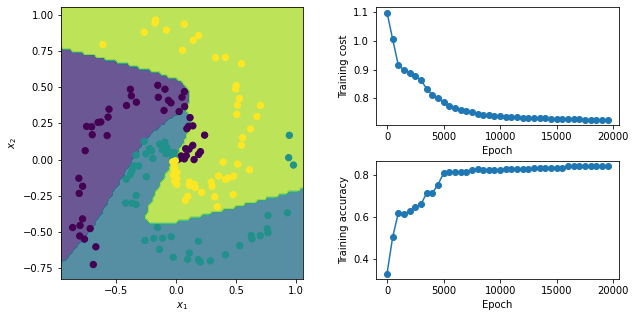

In [1233]:
epoch_list    = []
cost_training = []
acc_training  = []

############ Function for plotting: ############
def updatePlot():

    ### Generate coordinates covering the whole plane: ###
    padding = 0.1
    spacing = 0.02
    x1_min, x1_max = x_train[:, 0].min() - padding, x_train[:, 0].max() + padding
    x2_min, x2_max = x_train[:, 1].min() - padding, x_train[:, 1].max() + padding
    # Creating matric from the x1 and x2 vectors created above (https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
    x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, spacing),
                         np.arange(x2_min, x2_max, spacing))

    # .ravel() is used because the np.meshgrid created many instances of the same vector, so ravel puts it into one vector (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
    # np.c_ just puts together coordiates: takes one from x1_grid and one from x2_grid for each pairing (https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
    # .tensor creates a matrix with like objects in a specific format (in the case coordinates as float) (https://pytorch.org/docs/stable/tensors.html)
    torch_input = torch.tensor(np.c_[x1_grid.ravel(), x2_grid.ravel()], dtype = torch.float)
    # calls on model = FeedforwardNN(input_size, hidden_size, output_size) from above
    NN_output = model(torch_input)
    # .argmax() returns maximums along axis (https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)
    predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)

    ### Plot the classifier: ###
    plt.subplot(121)
    # the filled in colours to define "guesses"
    plt.contourf(x1_grid, x2_grid, predicted_class.reshape(x1_grid.shape), K, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train, s=40)
    plt.xlim(x1_grid.min(), x1_grid.max())
    plt.ylim(x2_grid.min(), x2_grid.max())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    ### Plot the cost function during training: ###
    plt.subplot(222)
    plt.plot(epoch_list,cost_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training cost')

    ### Plot the training accuracy: ###
    plt.subplot(224)
    plt.plot(epoch_list,acc_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training accuracy')
############ End of plotting function ############

### Train for several epochs: ###
for epoch in range(N_epochs):

    optimizer.zero_grad() # sets the gradients to zero (necessary since PyTorch accumulates the gradients)
    NN_output = model(x_train) # Neural network output
    cost = cost_func(NN_output, t_onehot)
    cost.backward() #computes the gradients
    optimizer.step() #updating the parameters 

    ### Update the plot and print results every 500 epochs: ###
    if epoch % 500 == 0:
        predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)
        accuracy = np.mean(predicted_class == t_train)
        
        epoch_list.append(epoch)
        cost_training.append(cost.detach().numpy())
        acc_training.append(accuracy)
        
        ### Update the plot of the resulting classifier: ###
        fig = plt.figure(2,figsize=(10,5))
        fig.subplots_adjust(hspace=.3,wspace=.3)
        plt.clf()
        updatePlot()
        display.display(plt.gcf())
        print("Iteration %d:\n  Training cost %f\n  Training accuracy %f\n" % (epoch, cost, accuracy) )
        display.clear_output(wait=True)
        # time.sleep(0.1) #Uncomment this line if you want to slow down the rate of plot updates


# avg20.append(accuracy)

# plt.savefig('spiral_results_nodes_20.png', bbox_inches="tight", facecolor = 'white')
print("Final Training cost %f\nFinal Training accuracy %f\n" % (cost, accuracy) )


Get average for each of the Q values and create list for x and y coordinate for scatterplot:

In [1688]:
avg_df = pd.DataFrame({
    '2nodes' : avg2, 
    '4nodes' : avg4, 
    '6nodes' : avg6, 
    '10nodes' : avg10, 
    '14nodes' : avg14, 
    '15nodes' : avg15, 
    '16nodes' : avg16, 
    '17nodes' : avg17, 
    '20nodes' : avg20
})
avg_df.loc['mean']= avg_df[0:10].mean(axis=0)
avg_df.loc['ci'] = 0.1 * np.std(avg_df[0:10]) / np.mean(avg_df[0:10])
avg_df

,2nodes,4nodes,6nodes,10nodes,14nodes,15nodes,16nodes,17nodes,20nodes
0,0.640000,0.753333,0.860000,0.846667,0.846667,0.766667,0.853333,0.786667,0.880000
1,0.640000,0.746667,0.840000,0.833333,0.846667,0.766667,0.853333,0.860000,0.786667
2,0.640000,0.793333,0.886667,0.840000,0.780000,0.833333,0.886667,0.853333,0.753333
3,0.640000,0.773333,0.860000,0.840000,0.860000,0.846667,0.860000,0.833333,0.780000
4,0.606667,0.753333,0.746667,0.840000,0.766667,0.860000,0.833333,0.860000,0.800000
5,0.606667,0.833333,0.840000,0.866667,0.780000,0.860000,0.833333,0.860000,0.880000
6,0.640000,0.760000,0.760000,0.940000,0.860000,0.760000,0.833333,0.840000,0.753333
7,0.640000,0.760000,0.833333,0.766667,0.860000,0.860000,0.860000,0.840000,0.840000
8,0.640000,0.753333,0.833333,0.766667,0.860000,0.766667,0.860000,0.860000,0.766667
9,0.640000,0.846667,0.833333,0.846667,0.760000,0.833333,0.860000,0.840000,0.840000


In [1689]:
x_nodes = [[2]*10, [4]*10, [6]*10, [10]*10, [14]*10, [15]*10, [16]*10, [17]*10, [20]*10]
x_nodes_avgs = [2, 4, 6, 10, 14, 15, 16, 17, 20]
y_nodes = [avg2, avg4, avg6, avg10, avg14, avg15, avg16, avg17, avg20]

Plot scatterplot Q vs accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

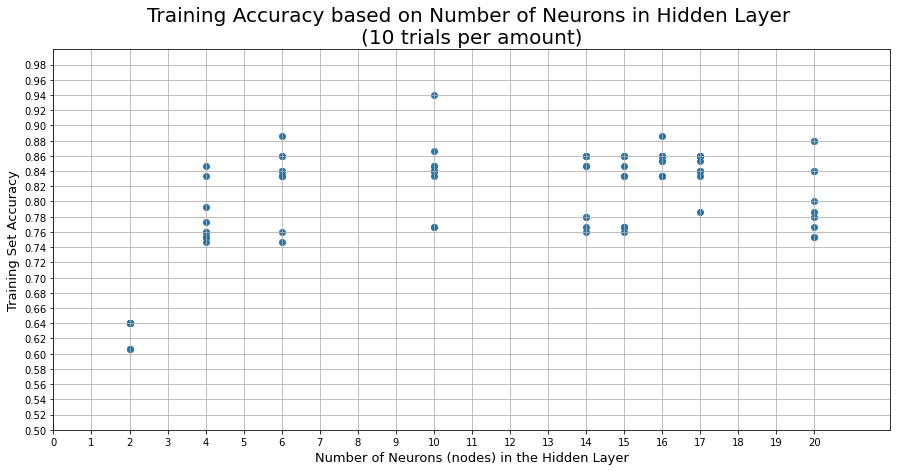

In [1690]:
plt.figure(figsize=(15, 7))

plt.scatter(x_nodes, y_nodes)
plt.title('Training Accuracy based on Number of Neurons in Hidden Layer \n(10 trials per amount)', fontsize = 20)
plt.xlabel('Number of Neurons (nodes) in the Hidden Layer', fontsize=13)
plt.ylabel('Training Set Accuracy', fontsize=13)

xmin, xmax, ymin, ymax = plt.axis([0, 22, 0.5, 1])
plt.xticks(np.arange(0, 21, step=1))
plt.yticks(np.arange(0.5, 1, step=0.02))
plt.grid()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

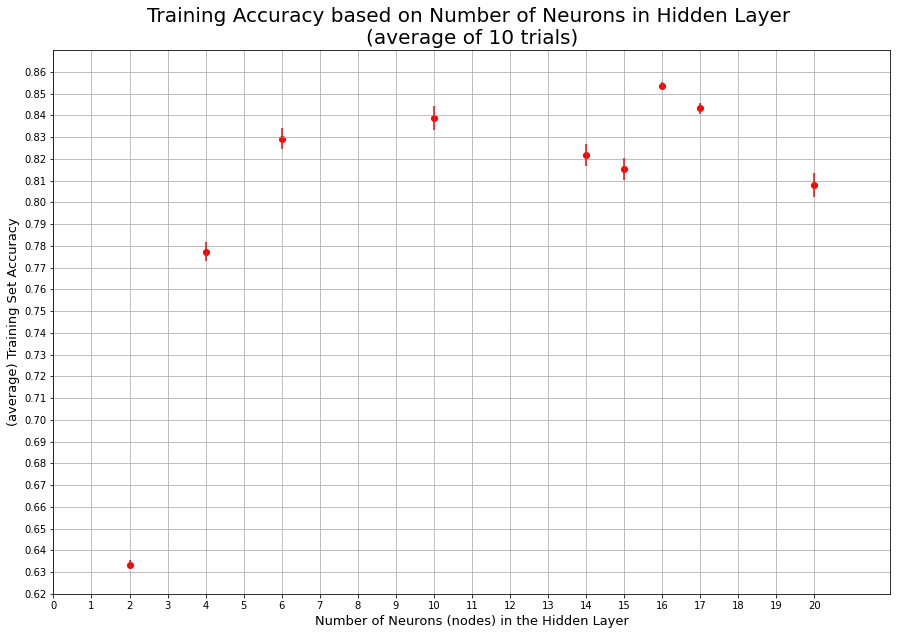

In [1698]:
plt.figure(figsize=(15, 10))

plt.scatter(x_nodes_avgs, y_nodes_avgs, color='red')
plt.title('Training Accuracy based on Number of Neurons in Hidden Layer \n(average of 10 trials)', fontsize = 20)
plt.xlabel('Number of Neurons (nodes) in the Hidden Layer', fontsize=13)
plt.ylabel('(average) Training Set Accuracy', fontsize=13)

xmin, xmax, ymin, ymax = plt.axis([0, 22, 0.62, 0.87])
plt.xticks(np.arange(0, 21, step=1))
plt.yticks(np.arange(0.62, 0.87, step=0.01))
plt.grid()

# Make CI indicators, to show how variant the avgs are from the other points:
plt.errorbar(x_nodes_avgs, avg_df.loc['mean'], yerr=avg_df.loc['ci'], color='red', linestyle='')

plt.show

### Conclusion
16 neurons in the hidden layer did the best, on average. Close behind was 17 and then 10.   
16 also had less variation than the other Q values. It is statistically better than the surrounding number of neurons.

-----

## 2.2 O2) Plotting accuracy as a function of Q = mag_noise

The magnitude of noise in the data:  
Q (mag_noise) = 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0    
*Number of hidden layer neurons: 4*    
*Activation functions: both layers softmax*    
*Learning rate: 1*

*Initiate lists for each Q to find average of accuracy*

In [ ]:
# I ran a couple trials of each just to find the right numbers to use
mag1 = [] # use N_epochs = 20000
mag2 = [] # use N_epochs = 15000
mag3 = [] # use N_epochs = 20000
mag5 = [] # use N_epochs = 35000
mag6 = [] # use N_epochs = 45000
mag7 = [] # use N_epochs = 45000
mag8 = [] # use N_epochs = 45000
mag9 = [] # use N_epochs = 60000
mag10 = [] # use N_epochs = 35000

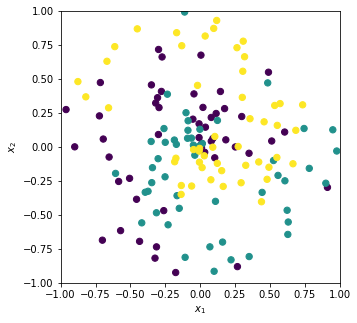

In [1710]:
N = 50 # number of points per branch
K = 3  # number of branches

N_train = N*K # total number of points in the training set
x_train = np.zeros((N_train,2)) # matrix containing the 2-dimensional datapoints
t_train = np.zeros(N_train, dtype='uint8') # labels (not in one-hot representation)

mag_noise = 1.0  # controls how much noise gets added to the data
dTheta    = 4    # difference in theta in each branch

### Data generation: ###
for j in range(K):
  ix = range(N*j,N*(j+1))
  r  = np.linspace(0.01,1,N) # radius
  th = np.linspace(j*(2*np.pi)/K,j*(2*np.pi)/K + dTheta,N) + np.random.randn(N)*mag_noise # theta
  x_train[ix] = np.c_[r*np.cos(th), r*np.sin(th)]
  t_train[ix] = j

### Plot the data set: ###
fig = plt.figure(1, figsize=(5,5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train, s=40)#, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('spiral_data_mag10.png', bbox_inches="tight")
plt.show()

In [1602]:
class FeedforwardNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
      # super is inheriting a lot of functionality that is getting from elsewhere
        super(FeedforwardNN, self).__init__()

        #layer sizes:
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        #functions used within the Feedforward NN:
        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.linear2 = torch.nn.Linear(self.hidden_size, self.output_size)
        # These do not need anything inside because the same will come out as it goes in
        self.relu    = torch.nn.ReLU() 
        self.sigmoid = torch.nn.Sigmoid()
        self.softmax = torch.nn.Softmax()   
    # Really important function: how your function propogates forward:   
    def forward(self, x):
        #Layer 1:
        linear1_out = self.linear1(x)
        h1 = self.softmax(linear1_out)
        #Layer 2:
        linear2_out = self.linear2(h1)
        h2 = self.softmax(linear2_out)

        #Network output:
        y = h2

        return y

input_size = 2 #2D data
hidden_size = 4
output_size = K 
model = FeedforwardNN(input_size, hidden_size, output_size)

### Store the input data as a PyTorch tensor ###
x_train = torch.tensor(x_train, dtype = torch.float)

### One hot encoding ###
t_onehot = np.zeros((t_train.size, K))
t_onehot[np.arange(t_train.size),t_train] = 1
t_onehot = torch.tensor(t_onehot, dtype = torch.float)

### Use backpropagation to minimize the cost function using the gradient descent algorithm: ###
learning_rate = 1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Cost function: ###
cost_func = torch.nn.CrossEntropyLoss()

N_epochs = 35000 # number of times to run gradient descent


/var/folders/2f/v588s3cn6bqfcb4gvqd8hc7r0000gn/T/ipykernel_83843/456624531.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype = torch.float)


Final Training cost 0.903960
Final Training accuracy 0.660000



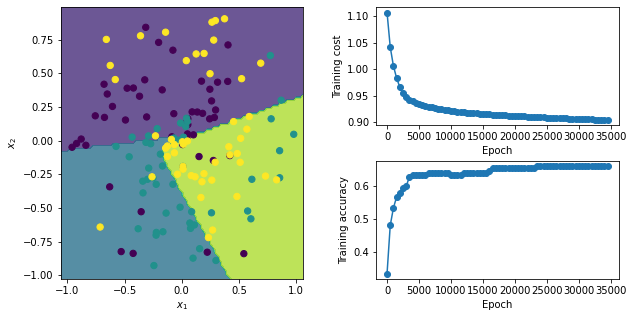

In [1603]:
epoch_list    = []
cost_training = []
acc_training  = []

############ Function for plotting: ############
def updatePlot():

    ### Generate coordinates covering the whole plane: ###
    padding = 0.1
    spacing = 0.02
    x1_min, x1_max = x_train[:, 0].min() - padding, x_train[:, 0].max() + padding
    x2_min, x2_max = x_train[:, 1].min() - padding, x_train[:, 1].max() + padding
    # Creating matric from the x1 and x2 vectors created above (https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
    x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, spacing),
                         np.arange(x2_min, x2_max, spacing))

    # .ravel() is used because the np.meshgrid created many instances of the same vector, so ravel puts it into one vector (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
    # np.c_ just puts together coordiates: takes one from x1_grid and one from x2_grid for each pairing (https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
    # .tensor creates a matrix with like objects in a specific format (in the case coordinates as float) (https://pytorch.org/docs/stable/tensors.html)
    torch_input = torch.tensor(np.c_[x1_grid.ravel(), x2_grid.ravel()], dtype = torch.float)
    # calls on model = FeedforwardNN(input_size, hidden_size, output_size) from above
    NN_output = model(torch_input)
    # .argmax() returns maximums along axis (https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)
    predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)

    ### Plot the classifier: ###
    plt.subplot(121)
    # the filled in colours to define "guesses"
    plt.contourf(x1_grid, x2_grid, predicted_class.reshape(x1_grid.shape), K, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train, s=40)
    plt.xlim(x1_grid.min(), x1_grid.max())
    plt.ylim(x2_grid.min(), x2_grid.max())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    ### Plot the cost function during training: ###
    plt.subplot(222)
    plt.plot(epoch_list,cost_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training cost')

    ### Plot the training accuracy: ###
    plt.subplot(224)
    plt.plot(epoch_list,acc_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training accuracy')
############ End of plotting function ############

### Train for several epochs: ###
for epoch in range(N_epochs):

    optimizer.zero_grad() # sets the gradients to zero (necessary since PyTorch accumulates the gradients)
    NN_output = model(x_train) # Neural network output
    cost = cost_func(NN_output, t_onehot)
    cost.backward() #computes the gradients
    optimizer.step() #updating the parameters 

    ### Update the plot and print results every 500 epochs: ###
    if epoch % 500 == 0:
        predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)
        accuracy = np.mean(predicted_class == t_train)
        
        epoch_list.append(epoch)
        cost_training.append(cost.detach().numpy())
        acc_training.append(accuracy)
        
        ### Update the plot of the resulting classifier: ###
        fig = plt.figure(2,figsize=(10,5))
        fig.subplots_adjust(hspace=.3,wspace=.3)
        plt.clf()
        updatePlot()
        display.display(plt.gcf())
        print("Iteration %d:\n  Training cost %f\n  Training accuracy %f\n" % (epoch, cost, accuracy) )
        display.clear_output(wait=True)
        # time.sleep(0.1) #Uncomment this line if you want to slow down the rate of plot updates


# mag10.append(accuracy)

# plt.savefig('spiral_results_mag_10.png', bbox_inches="tight", facecolor = 'white')
print("Final Training cost %f\nFinal Training accuracy %f\n" % (cost, accuracy) )


In [1649]:
mag_df = pd.DataFrame({
    'mag0.1' : mag1, 
    'mag0.2' : mag2, 
    'mag0.3' : mag3, 
    'mag0.5' : mag5, 
    'mag0.6' : mag6, 
    'mag0.7' : mag7, 
    'mag0.8' : mag8, 
    'mag0.9' : mag9, 
    'mag1.0' : mag10
})
mag_df.loc['mean']= mag_df[0:10].mean(axis=0)
mag_df.loc['ci'] = 0.1 * np.std(mag_df[0:10]) / np.mean(mag_df[0:10])
mag_df

,mag0.1,mag0.2,mag0.3,mag0.5,mag0.6,mag0.7,mag0.8,mag0.9,mag1.0
0,0.826667,0.786667,0.773333,0.820000,0.700000,0.680000,0.626667,0.700000,0.606667
1,0.873333,0.753333,0.840000,0.686667,0.793333,0.700000,0.653333,0.720000,0.653333
2,0.886667,0.880000,0.753333,0.800000,0.686667,0.546667,0.720000,0.720000,0.646667
3,0.880000,0.880000,0.840000,0.706667,0.793333,0.633333,0.626667,0.673333,0.653333
4,0.793333,0.826667,0.846667,0.800000,0.700000,0.673333,0.633333,0.713333,0.653333
5,0.880000,0.813333,0.800000,0.793333,0.786667,0.740000,0.693333,0.713333,0.653333
6,0.793333,0.780000,0.753333,0.820000,0.793333,0.660000,0.693333,0.686667,0.693333
7,0.780000,0.820000,0.800000,0.820000,0.793333,0.673333,0.693333,0.713333,0.653333
8,0.813333,0.826667,0.780000,0.820000,0.793333,0.673333,0.693333,0.726667,0.653333
9,0.766667,0.826667,0.793333,0.820000,0.700000,0.693333,0.633333,0.726667,0.660000


Get average for each of the Q values and create list for x and y coordinate for scatterplot:

In [1685]:
x_mag = [[0.1]*10, [0.2]*10, [0.3]*10, [0.5]*10, [0.6]*10, [0.7]*10, [0.8]*10, [0.9]*10, [1.0]*10]
x_mag_avgs = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y_mag = [mag1, mag2, mag3, mag5, mag6, mag7, mag8, mag9, mag10]


### Plot scatterplot Q vs accuracy:

Plotting all 10 trials per Q-value

<function matplotlib.pyplot.show(close=None, block=None)>

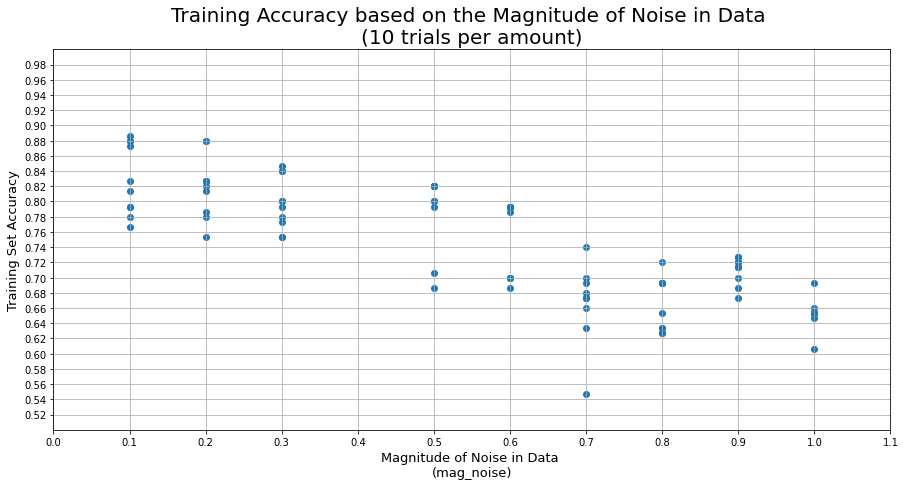

In [1686]:
plt.figure(figsize=(15, 7))

plt.scatter(x_mag, y_mag)
plt.title('Training Accuracy based on the Magnitude of Noise in Data \n(10 trials per amount)', fontsize = 20)
plt.xlabel('Magnitude of Noise in Data \n(mag_noise)', fontsize=13)
plt.ylabel('Training Set Accuracy', fontsize=13)

xmin, xmax, ymin, ymax = plt.axis([0, 1.0, 0.5, 1.0])
plt.xticks(np.arange(0, 1.2, step=0.1))
plt.yticks(np.arange(0.52, 1.0, step=0.02))
plt.grid()

plt.show

Plotting average of 10 trial runs:

<function matplotlib.pyplot.show(close=None, block=None)>

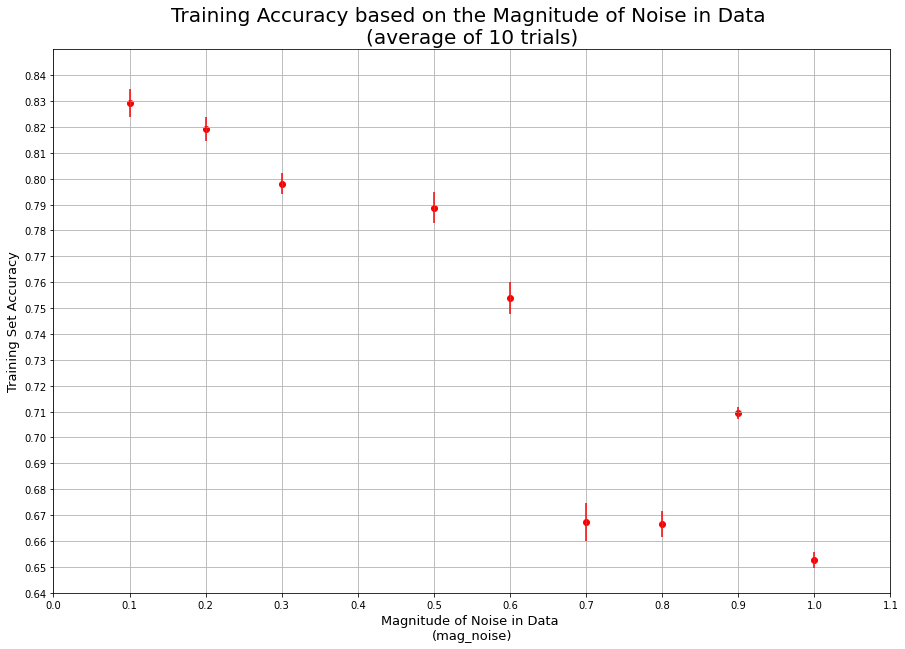

In [1700]:
plt.figure(figsize=(15, 10))

plt.scatter(x_mag_avgs, y_mag_avgs, color='red')
plt.title('Training Accuracy based on the Magnitude of Noise in Data \n(average of 10 trials)', fontsize = 20)
plt.xlabel('Magnitude of Noise in Data \n(mag_noise)', fontsize=13)
plt.ylabel('Training Set Accuracy', fontsize=13)

xmin, xmax, ymin, ymax = plt.axis([0, 1.0, 0.64, 0.85])
plt.xticks(np.arange(0, 1.2, step=0.1))
plt.yticks(np.arange(0.64, .85, step=0.01))
plt.grid()

# Plot the confidence interval
plt.errorbar(x_mag_avgs, mag_df.loc['mean'], yerr=mag_df.loc['ci'], color='red', linestyle='')

plt.show


### Conclusion
Obviously the algorithms did better with less noise in the data. It is interesting to note that with 0.9 magnitude the algorithms did better than surrounding (and it also had the least variablity in the data). I'm not quite sure why that is, but it was an interesting fact from the data collected.

--------

## 2.2 O3) Plotting accuracy as a function of Q = K (number of labels)

The number of labels in the dataset:  
Q (K) = 2, 3, 4, 5, 6, 7    
*Number of hidden layer neurons: 4*    
*Activation functions: both layers softmax*    
*Learning rate: adjusted*   
*mag_noise = 0.3*

*Initiate lists for each Q to find average of accuracy*

In [ ]:
# I ran a couple trials of each just to find the right numbers to use
# learning rate 1 (unless otherwise specified)
k2 = [] # use N_epochs = 10000
k3 = [] # use N_epochs = 21000
k4 = [] # use N_epochs = 35000
k5 = [] # use N_epochs = 40000; learning rate 3
k6 = [] # use N_epochs = 50000; learning rate 5
k7 = [] # use N_epochs = 70000; learning rate 7

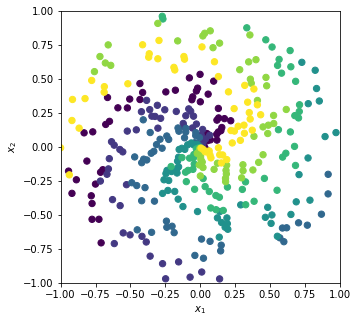

In [1919]:
N = 50 # number of points per branch
K = 7  # number of branches

N_train = N*K # total number of points in the training set
x_train = np.zeros((N_train,2)) # matrix containing the 2-dimensional datapoints
t_train = np.zeros(N_train, dtype='uint8') # labels (not in one-hot representation)

mag_noise = 0.3  # controls how much noise gets added to the data
dTheta    = 4    # difference in theta in each branch

### Data generation: ###
for j in range(K):
  ix = range(N*j,N*(j+1))
  r  = np.linspace(0.01,1,N) # radius
  th = np.linspace(j*(2*np.pi)/K,j*(2*np.pi)/K + dTheta,N) + np.random.randn(N)*mag_noise # theta
  x_train[ix] = np.c_[r*np.cos(th), r*np.sin(th)]
  t_train[ix] = j

### Plot the data set: ###
fig = plt.figure(1, figsize=(5,5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train, s=40)#, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('spiral_data_k7.png', bbox_inches="tight", facecolor = 'white')
plt.show()

In [1960]:
class FeedforwardNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
      # super is inheriting a lot of functionality that is getting from elsewhere
        super(FeedforwardNN, self).__init__()

        #layer sizes:
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        #functions used within the Feedforward NN:
        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.linear2 = torch.nn.Linear(self.hidden_size, self.output_size)
        # These do not need anything inside because the same will come out as it goes in
        self.relu    = torch.nn.ReLU() 
        self.sigmoid = torch.nn.Sigmoid()
        self.softmax = torch.nn.Softmax()   
    # Really important function: how your function propogates forward:   
    def forward(self, x):
        #Layer 1:
        linear1_out = self.linear1(x)
        h1 = self.softmax(linear1_out)
        #Layer 2:
        linear2_out = self.linear2(h1)
        h2 = self.softmax(linear2_out)

        #Network output:
        y = h2

        return y

input_size = 2 #2D data
hidden_size = 4
output_size = K 
model = FeedforwardNN(input_size, hidden_size, output_size)

### Store the input data as a PyTorch tensor ###
x_train = torch.tensor(x_train, dtype = torch.float)

### One hot encoding ###
t_onehot = np.zeros((t_train.size, K))
t_onehot[np.arange(t_train.size),t_train] = 1
t_onehot = torch.tensor(t_onehot, dtype = torch.float)

### Use backpropagation to minimize the cost function using the gradient descent algorithm: ###
learning_rate = 7
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Cost function: ###
cost_func = torch.nn.CrossEntropyLoss()

N_epochs = 70000 # number of times to run gradient descent


/var/folders/2f/v588s3cn6bqfcb4gvqd8hc7r0000gn/T/ipykernel_83843/1410706254.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype = torch.float)


Final Training cost 1.753215
Final Training accuracy 0.451429



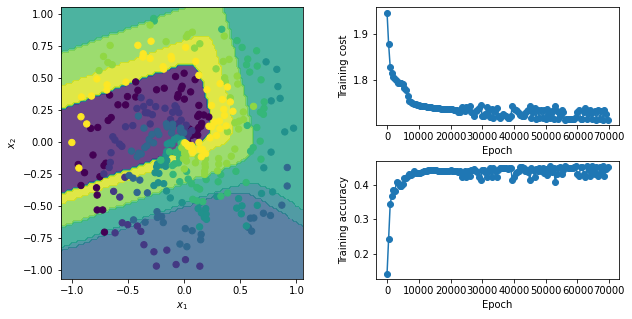

In [1961]:
epoch_list    = []
cost_training = []
acc_training  = []

############ Function for plotting: ############
def updatePlot():

    ### Generate coordinates covering the whole plane: ###
    padding = 0.1
    spacing = 0.02
    x1_min, x1_max = x_train[:, 0].min() - padding, x_train[:, 0].max() + padding
    x2_min, x2_max = x_train[:, 1].min() - padding, x_train[:, 1].max() + padding
    # Creating matric from the x1 and x2 vectors created above (https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
    x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, spacing),
                         np.arange(x2_min, x2_max, spacing))

    # .ravel() is used because the np.meshgrid created many instances of the same vector, so ravel puts it into one vector (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
    # np.c_ just puts together coordiates: takes one from x1_grid and one from x2_grid for each pairing (https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
    # .tensor creates a matrix with like objects in a specific format (in the case coordinates as float) (https://pytorch.org/docs/stable/tensors.html)
    torch_input = torch.tensor(np.c_[x1_grid.ravel(), x2_grid.ravel()], dtype = torch.float)
    # calls on model = FeedforwardNN(input_size, hidden_size, output_size) from above
    NN_output = model(torch_input)
    # .argmax() returns maximums along axis (https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)
    predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)

    ### Plot the classifier: ###
    plt.subplot(121)
    # the filled in colours to define "guesses"
    plt.contourf(x1_grid, x2_grid, predicted_class.reshape(x1_grid.shape), K, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train, s=40)
    plt.xlim(x1_grid.min(), x1_grid.max())
    plt.ylim(x2_grid.min(), x2_grid.max())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    ### Plot the cost function during training: ###
    plt.subplot(222)
    plt.plot(epoch_list,cost_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training cost')

    ### Plot the training accuracy: ###
    plt.subplot(224)
    plt.plot(epoch_list,acc_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training accuracy')
############ End of plotting function ############

### Train for several epochs: ###
for epoch in range(N_epochs):

    optimizer.zero_grad() # sets the gradients to zero (necessary since PyTorch accumulates the gradients)
    NN_output = model(x_train) # Neural network output
    cost = cost_func(NN_output, t_onehot)
    cost.backward() #computes the gradients
    optimizer.step() #updating the parameters 

    ### Update the plot and print results every 500 epochs: ###
    if epoch % 500 == 0:
        predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)
        accuracy = np.mean(predicted_class == t_train)
        
        epoch_list.append(epoch)
        cost_training.append(cost.detach().numpy())
        acc_training.append(accuracy)
        
        ### Update the plot of the resulting classifier: ###
        fig = plt.figure(2,figsize=(10,5))
        fig.subplots_adjust(hspace=.3,wspace=.3)
        plt.clf()
        updatePlot()
        display.display(plt.gcf())
        print("Iteration %d:\n  Training cost %f\n  Training accuracy %f\n" % (epoch, cost, accuracy) )
        display.clear_output(wait=True)
        # time.sleep(0.1) #Uncomment this line if you want to slow down the rate of plot updates


# k7.append(accuracy)

# plt.savefig('spiral_results_k_7.png', bbox_inches="tight", facecolor = 'white')
print("Final Training cost %f\nFinal Training accuracy %f\n" % (cost, accuracy) )


In [1964]:
k_df = pd.DataFrame({
    'k2' : k2, 
    'k3' : k3, 
    'k4' : k4, 
    'k5' : k5, 
    'k6' : k6, 
    'k7' : k7
})
k_df.loc['mean']= k_df[0:10].mean(axis=0)
k_df.loc['ci'] = 0.1 * np.std(k_df[0:10]) / np.mean(k_df[0:10])
k_df

,k2,k3,k4,k5,k6,k7
0,0.850000,0.753333,0.715000,0.644000,0.506667,0.471429
1,0.860000,0.800000,0.675000,0.568000,0.486667,0.457143
2,0.850000,0.860000,0.695000,0.592000,0.483333,0.462857
3,0.860000,0.873333,0.670000,0.636000,0.490000,0.451429
4,0.850000,0.820000,0.695000,0.628000,0.496667,0.428571
5,0.960000,0.800000,0.695000,0.584000,0.533333,0.494286
6,0.850000,0.866667,0.590000,0.644000,0.396667,0.457143
7,0.950000,0.800000,0.680000,0.620000,0.513333,0.382857
8,0.850000,0.820000,0.705000,0.652000,0.543333,0.454286
9,0.850000,0.820000,0.685000,0.540000,0.416667,0.451429


Get average for each of the Q values and create list for x and y coordinate for scatterplot:

In [1965]:
x_k = [[2]*10, [3]*10, [4]*10, [5]*10, [6]*10, [7]*10]
x_k_avgs = [2, 3, 4, 5, 6, 7]
y_k = [k2, k3, k4, k5, k6, k7]

### Plot scatterplot Q vs accuracy:

Plotting all 10 trials per Q-value

<function matplotlib.pyplot.show(close=None, block=None)>

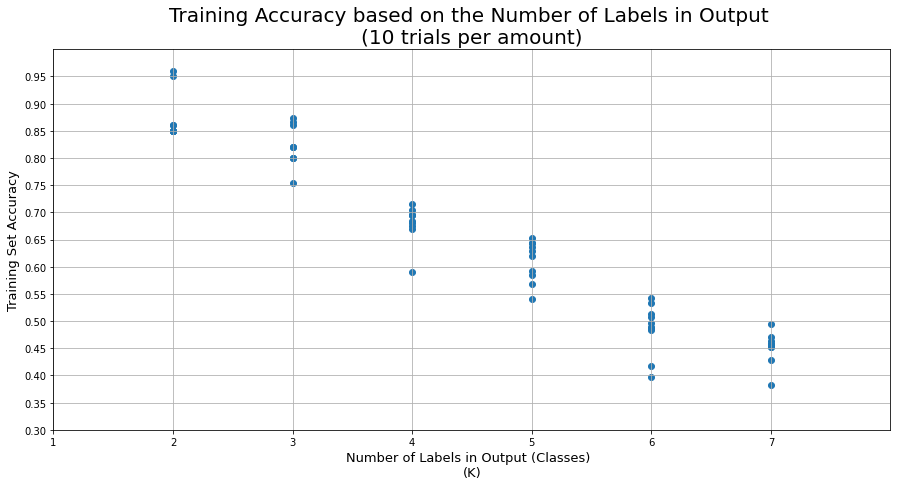

In [1969]:
plt.figure(figsize=(15, 7))

plt.scatter(x_k, y_k)
plt.title('Training Accuracy based on the Number of Labels in Output \n(10 trials per amount)', fontsize = 20)
plt.xlabel('Number of Labels in Output (Classes)  \n(K)', fontsize=13)
plt.ylabel('Training Set Accuracy', fontsize=13)

xmin, xmax, ymin, ymax = plt.axis([1, 8, 0.3, 1])
plt.xticks(np.arange(1, 8, step=1))
plt.yticks(np.arange(0.3, 1, step=0.05))
plt.grid()

plt.show

Plotting average of 10 trial runs:

<function matplotlib.pyplot.show(close=None, block=None)>

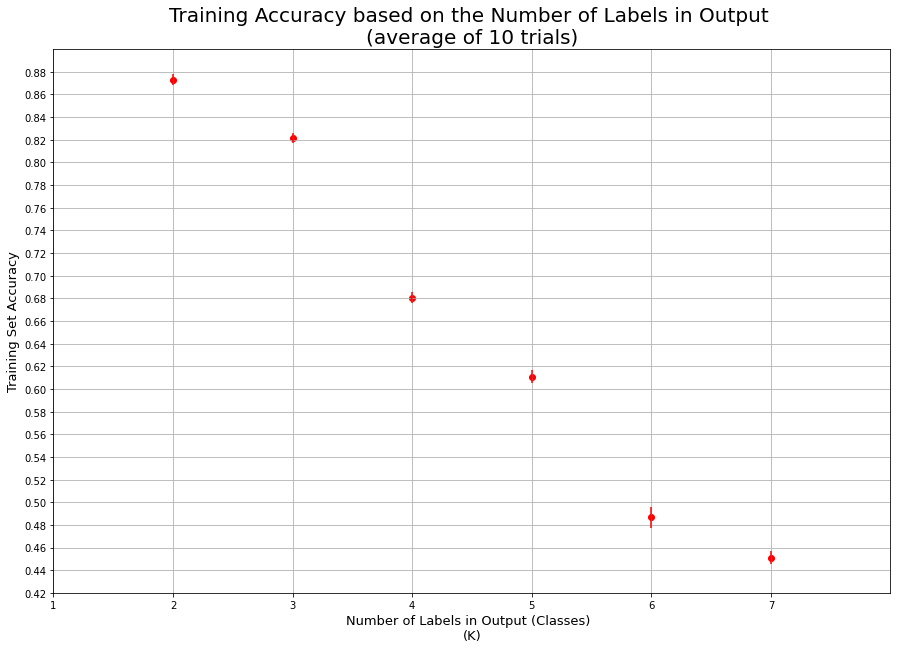

In [1974]:
plt.figure(figsize=(15, 10))

plt.scatter(x_k_avgs, k_df.loc['mean'], color='red')
plt.title('Training Accuracy based on the Number of Labels in Output \n(average of 10 trials)', fontsize = 20)
plt.xlabel('Number of Labels in Output (Classes)  \n(K)', fontsize=13)
plt.ylabel('Training Set Accuracy', fontsize=13)

xmin, xmax, ymin, ymax = plt.axis([1, 8, 0.42, 0.9])
plt.xticks(np.arange(1, 8, step=1))
plt.yticks(np.arange(0.42, 0.9, step=0.02))
plt.grid()

# Plot the confidence interval
plt.errorbar(x_k_avgs, k_df.loc['mean'], yerr=k_df.loc['ci'], color='red', linestyle='')

plt.show


### Conclusion
As can be expected, the training accuracy severely decreases as the number of labels increases. The accuracy could probably be improved by increasing the number of hidden layer neurons, and increasing epochs even more. I wanted to keep the majority of variables the same throughout my trials in order to be able to compare the change in labels (having to adjust epochs and learning rate to get optimal results for the rest of the variables being held the same).

--------